# **------------------------- Introduction-------------------------**

* Hierarchical clustering is a clustering algorithm that **creates a hierarchy of clusters** by iteratively **merging or splitting them** based on their similarity.

* It is very common in biology.

* It helps the user to decide the number of clusters instead of burdering the user to decide K value beforehand.

**Q: How we can get to know that when to use hierarchical clustering and when K-Means clustering?**

Answer: Choose hierarchical clustering when you want to explore clusters without specifying the number in advance, and use k-means clustering when you have a predetermined number of clusters in mind.

# **----------------Types of Hierarchical Clustering------------------**

It has two main types to use:

## **1. Agglomerative Approach:**

  * It is a bottom-up approach.
  * It starts clustering by treating the individual data points as a single cluster then it is merged continuously based on similarity until it forms one big cluster containing all objects.
  * Use the agglomerative approach when you have a large number of individual data points and want to gradually merge them into clusters.
  * Agglomerative clustering is commonly used when the desired output is a dendrogram to visualize the hierarchical relationships between clusters.

**Example:**

  * Suppose we have 6 data points:

  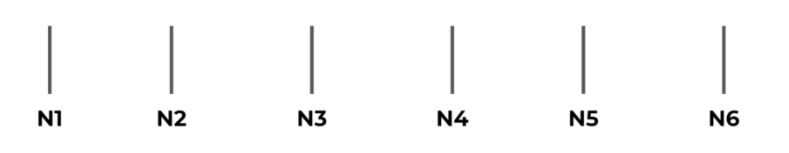



  * Make cluster of 2 2 points which are similar to each other:

  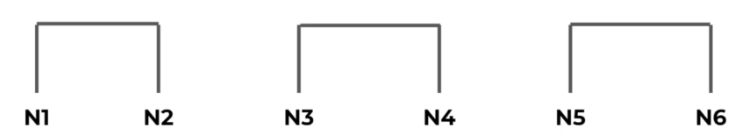

  * The similarity is calculated based off the features values of these points. It is calculated using distance metric.

  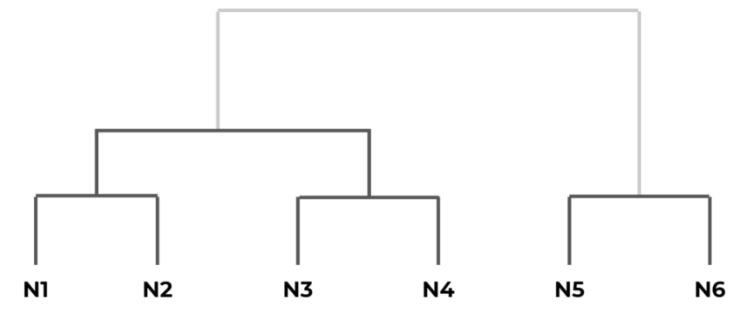

## **2. Divisive Approach:**

  * Divisive clustering works just the opposite of agglomerative clustering.
  * It starts by considering all the data points into a big single cluster and later on splitting them into smaller heterogeneous (dissimilar) clusters continuously until all data points are in their own cluster.
  * Use the divisive approach when you have a smaller dataset.
  * Divisive clustering can be computationally expensive, especially for larger datasets, as it involves recursively splitting clusters.


# **----------- Features Scaling: MinMax Scale ------------**

* MinMax scaling, also known as MinMax normalization is a data preprocessing technique commonly used in hierarchical clustering. It scales the data between 0 and 1. Because max distance 1, min distance = 0, (1-0) = 1.

* Hierarchical clustering algorithms often use distance-based metrics to measure similarity or dissimilarity between data points.

* These metrics are sensitive to the scale of the features. If the features have significantly different scales, it can lead to biased clustering results, where features with larger scales dominate the similarity calculation.

* MinMax scaling helps to mitigate this issue by bringing all features to a common scale between a specified range, typically 0 and 1.

# **------------------ Hyperparameters ------------------**

Hierarchical clustering has the following hyperparameters:

## **1. similarity_metric:**

  * It measure distance between 2 data points. If distance is more, it means points are not more similar to each other. If distance is small, it means points are more similiar to each other.

  * We have the following similarity metrics to use:
  
  a. Euclidean
  
  b. Manhattan
  
  c. Cosine

  etc.

  Euclidean distance is preferable as it is easier to understand in combination with MinMax Scaler.

  It is just like pythagorus theorem:

  $(a)^2 = (b)^2 + (c)^2$

  So,

  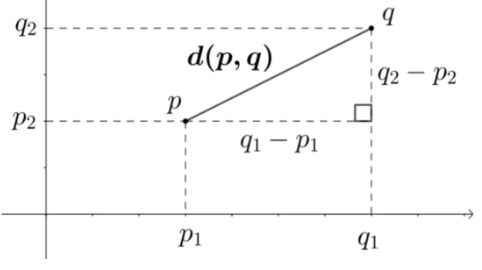

  So, euclidean distance between data point p and q is:

  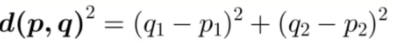

  * Euclidean distance is also sometimes called **Pythagorus Distance.**

  * It is used as: **'affine': 'euclidean'**.


## **2. row_clustering = True ---- col_clustering = False:**

  * By default, seaborn is gonna cluster both, along the rows and the columns.
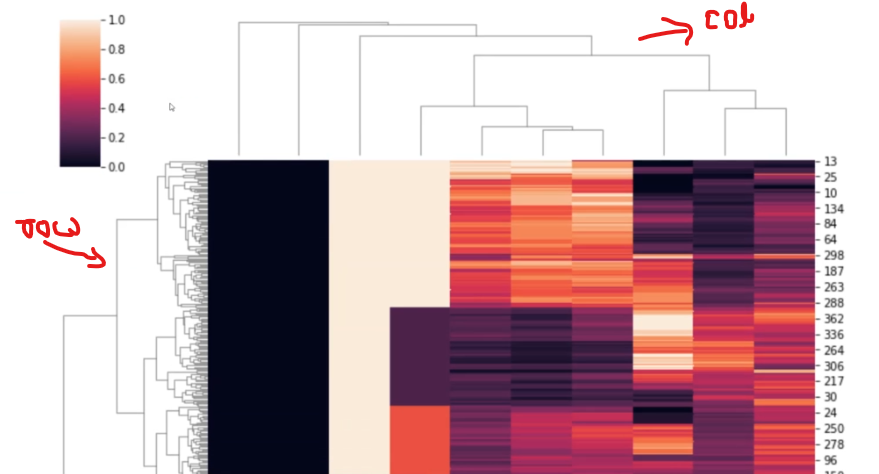


  * rows are data points.

  * row_clustering is always recommedned.

  * col_clustering is just gonna tell which features are related to each other but that's not the purpose of clustering. Because if we want that, we can simply do that with df.corr().

## **3. distance_threshold:**

*  The distance_threshold parameter determines the **maximum distance allowed between two data points** for them to be grouped into the same cluster. If the distance between two data points is less than or equal to the distance_threshold, they are considered similar and assigned to the same cluster.

* It is set as distance_threshold = None, by default. If it is None, it means you should give number of clusters by yourself.

* The minimum distance_threshold can be set to 0, which means clusters will continue to be merged until all data points are in a single cluster..

* If you set the distance_threshold to 3, it means that any two data points with a distance of 3 or less between them will be grouped into the same cluster.

# **------------------ Dendrogram ------------------**

* A dendrogram is a tree-like diagram displaying all the potential clusters.

* It is very computationally expensive to compute and display for LARGER DATASETS.

* It is very useful for deciding the number of clusters.

* Suppose we have the following dendrogram:

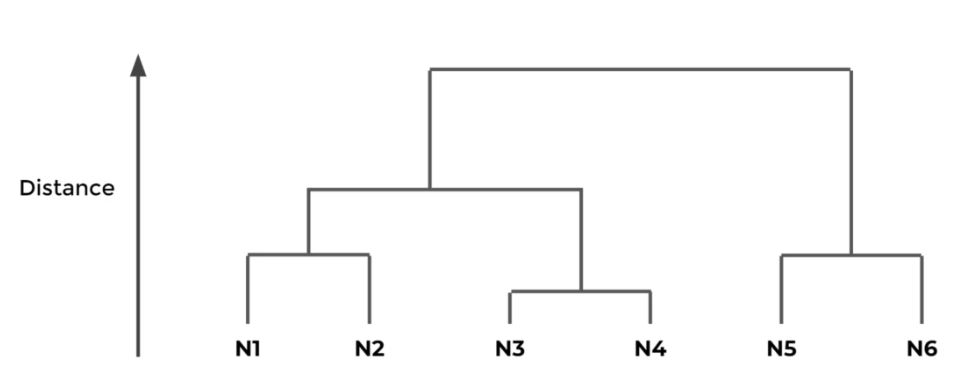

* We can see that y-axis is showing the length of distance between 2 data points.

* The distance between N3 and N4 is shorter while N5 and N6 has a very long distance.

**Q: How do we measure distance of a point from a cluster OR how do we measure the distance from a cluster to another cluster?**

**Answer:** We use **linkage** parameter for this purpose. It determines which distance to use between point to cluster OR cluster to cluster.

It has following types to use any of them:

**1. Ward:** It calculates distance by minimizes variance of clusters to merge. Ward linkage is particularly useful when dealing with data that has uneven cluster sizes.

**2. Average:** It uses average distance between 2 sets. Average linkage, also known as UPGMA (Unweighted Pair Group Method with Arithmetic Mean), computes the distance between clusters by taking the average of all pairwise distances between the data points in one cluster and the data points in the other cluster.

**3. Minimum or Maximum:** Minimum linkage, also known as single linkage, calculates the distance between clusters by considering the minimum distance between any pair of data points, one from each cluster.




## **Truncate Mode:**

The Truncate Mode determines when to cut or stop merging clusters, thereby defining the desired number of clusters.

# **---------------------- Coding -------------------------**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/sample_data/cluster_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [16]:
df = df.dropna()

# **1. Scaling:**

In [17]:
X = pd.get_dummies(df.drop('name', axis=1))

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

Now all data is between 0 and 1. But it has converted data to numpy array. We need to convert it back to dataframe.

In [21]:
scaled_df = pd.DataFrame(scaled_data, columns = X.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


Let's do cluster mapping.

<Figure size 1500x800 with 0 Axes>

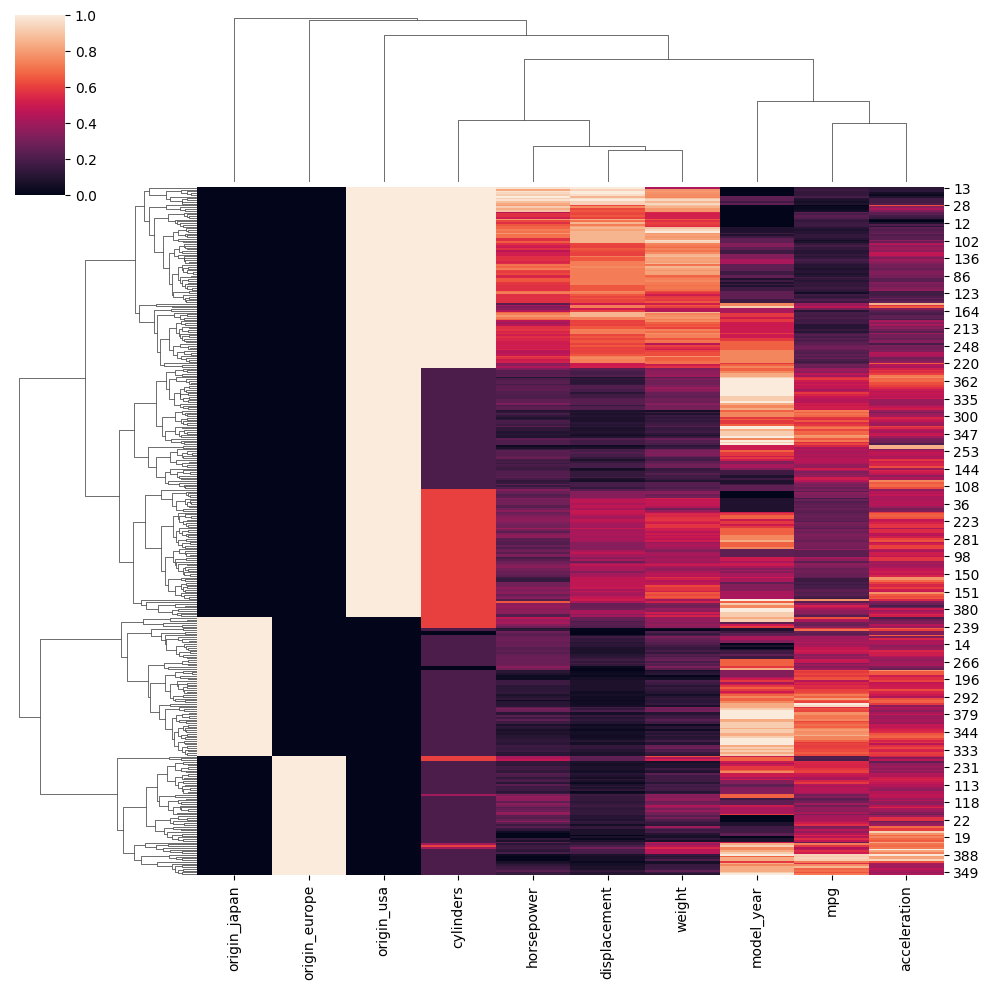

In [23]:
plt.figure(figsize = (15,8))
sns.clustermap(scaled_df);

We need only row clustering.

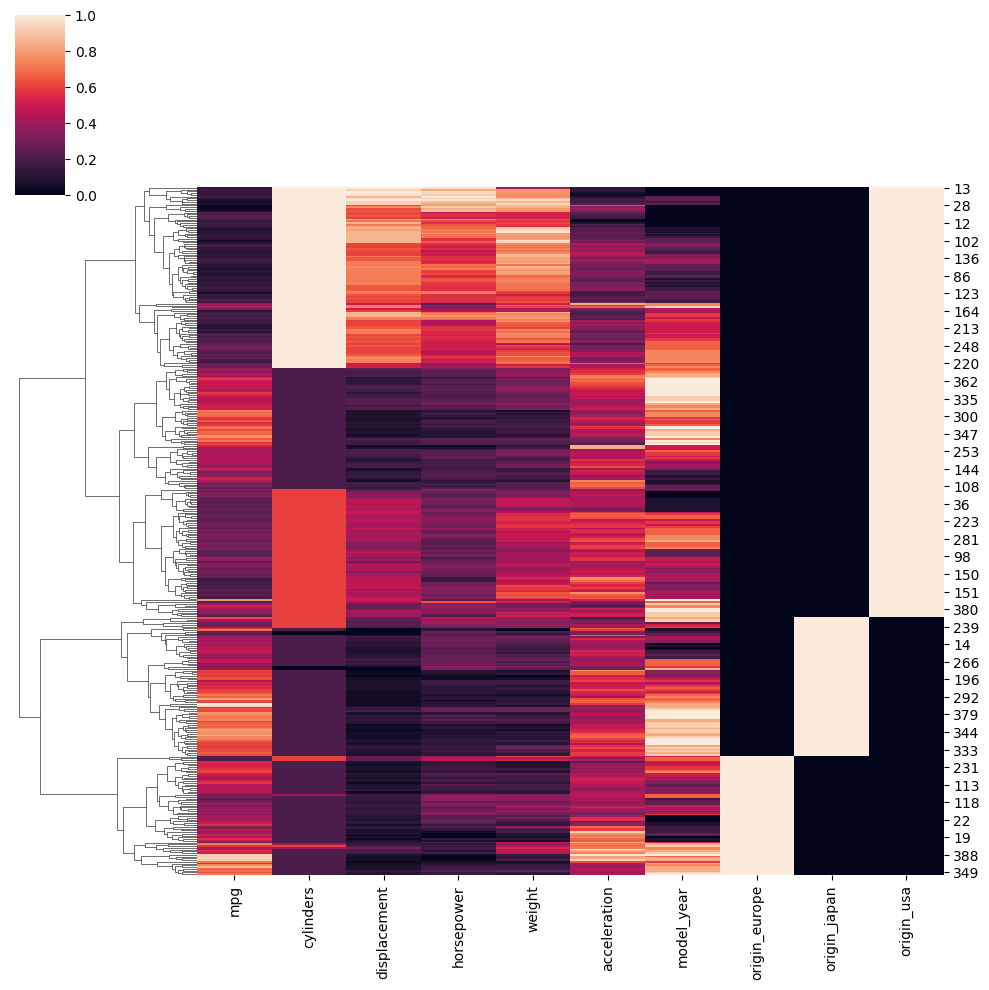

In [24]:
sns.clustermap(scaled_df, col_cluster = False)

Firstly, lets use it by defining the number of clusters yourself.

In [25]:
from sklearn.cluster import AgglomerativeClustering

model  = AgglomerativeClustering(n_clusters = 4)
cluster_labels = model.fit_predict(scaled_df)

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

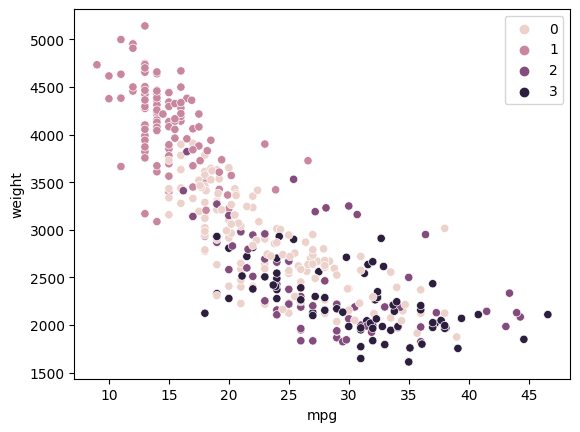

In [27]:
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue =cluster_labels);

It shows lower weight cars have high miles per gallons.

Let's change the color of hue. Its not visible here clearly.

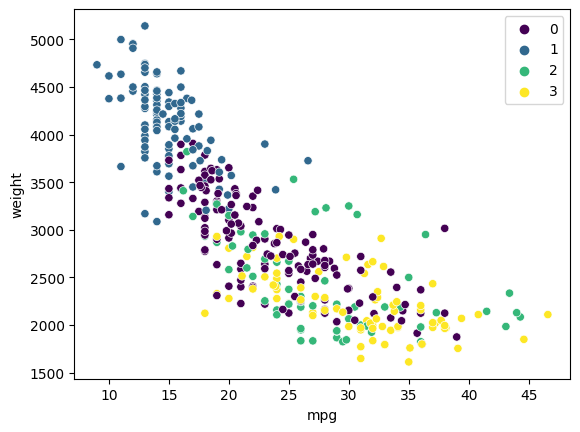

In [28]:
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue =cluster_labels, palette = 'viridis');

In [29]:
model  = AgglomerativeClustering(n_clusters = None, distance_threshold = 0)
cluster_labels = model.fit_predict(scaled_df)

cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

It gave all unique numbers because we used distance_threshold is None. It means make cluster equal to number of datapoints in dataset.

Let's make dendrogram.

In [31]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Let's make linkage model or linkage matrix.

In [32]:
linkage_matrix = hierarchy.linkage(model.children_)

In [33]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

In it first line shows, we are gonna combine two points, 67 and 161 to make a new cluster. 1.41421356 is the distance between point 67 and 161. 2 shows that this involves 2 points.

In the last line, 391 points are included so its biggest cluster we got after merging through Agglomerative.

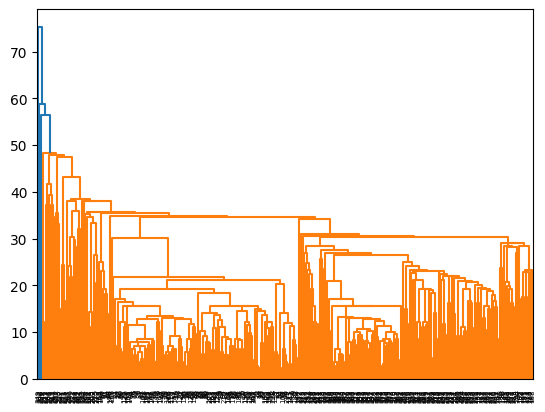

In [34]:
dendro = dendrogram(linkage_matrix)

Ugh. Sooo messed up diagram. We don't even know where to perform cutoff. Let's start doing it with our choice.

 truncate_mode='lastp', p = 10  will truncate the dendrogram to show the last 10 non-singleton (clusters that have more than one data point) clusters formed during clustering.

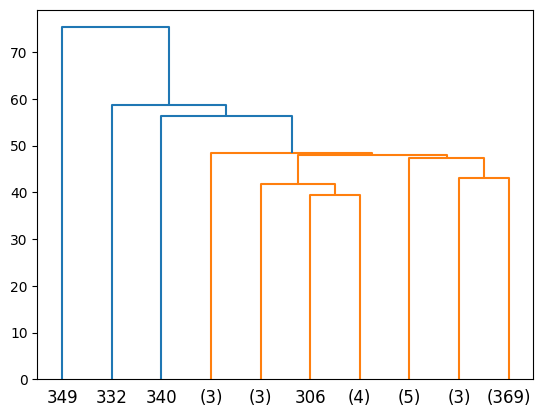

In [35]:
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p = 10)

Top 10 clusters are displayed. Let's change the truncate mode to 'Level'. It asks how many levels of tree you want. We set it with p. We want 10 levels. It will truncate the dendrogram at level 10, showing the top 10 levels or depth of the hierarchical tree.

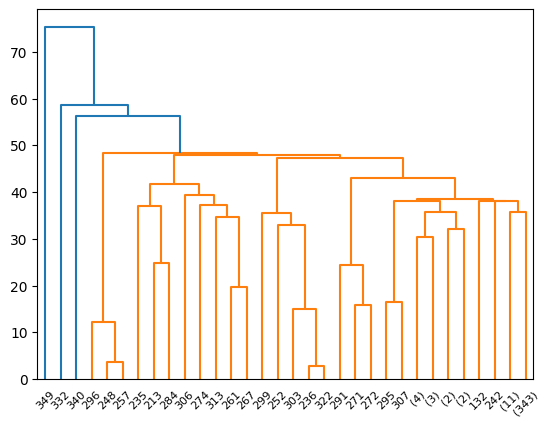

In [36]:
dendro = dendrogram(linkage_matrix, truncate_mode='level', p = 10)

It is not highly recommended method. Its just to make you feel comfortable with visualizing dendrogram.

How to set the distance_threshold??

Calculate it with this:

In [38]:
distance_thresh = np.sqrt(len(scaled_df.columns))
distance_thresh

3.1622776601683795

Use distance_threshold as 3.16 between 2 point.